In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Crops test visuals

In [2]:
crops_cont = pd.read_pickle('./data/pickles/crops_continents.pkl')

In [3]:
crops_cont

,Area,Element Code,Element,Year,Unit,Value,Flag,Item
365386,Africa,51,Production Quantity,2007.0,tonnes,139821617.0,A,cereals_total
365387,Africa,51,Production Quantity,2006.0,tonnes,150119632.0,A,cereals_total
365388,Africa,51,Production Quantity,2005.0,tonnes,142679381.0,A,cereals_total
365389,Africa,51,Production Quantity,2004.0,tonnes,133954000.0,A,cereals_total
365390,Africa,51,Production Quantity,2003.0,tonnes,132372307.0,A,cereals_total
...,...,...,...,...,...,...,...,...
2169672,South America,51,Production Quantity,1965.0,tonnes,7810492.0,A,vegetables_melons_total
2169673,South America,51,Production Quantity,1964.0,tonnes,7747586.0,A,vegetables_melons_total
2169674,South America,51,Production Quantity,1963.0,tonnes,7302707.0,A,vegetables_melons_total
2169675,South America,51,Production Quantity,1962.0,tonnes,7276618.0,A,vegetables_melons_total


In [ ]:
crops_cont = crops_cont[crops_cont['Element'] == 'Production Quantity']
interesting_categories = ['cereals_total', 'potatoes', 'vegetables_melons_total']
crops_cont = crops_cont[crops_cont['Item'].isin(interesting_categories)]
crops = crops_cont.reset_index().drop(['index'], axis = 1)
crops.head(3)

In [10]:
def plot_compare_areas(df, y, x = 'Year', title = 'NoTitle'):
    """
    Plots one line per Area in df. 
    X-axis default Years, while y-axis has to be passed
    
    params:
        df: pandas dataframe with data
        y: value to be plotted on y-axis. Must be a column in df
        x: value on x-axis. Default years
        title: chosen title on plot.
        save_png: saves a png of plot in plots, and filename is title
    """
    
    fig, ax = plt.subplots(figsize = (16,8))
    df_grouped = df.groupby(['Area'])
    
    for area, group in df_grouped:
        sns.lineplot(group[x], group[y], label=area, palette=('BuGn_r'))
    plt.legend()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

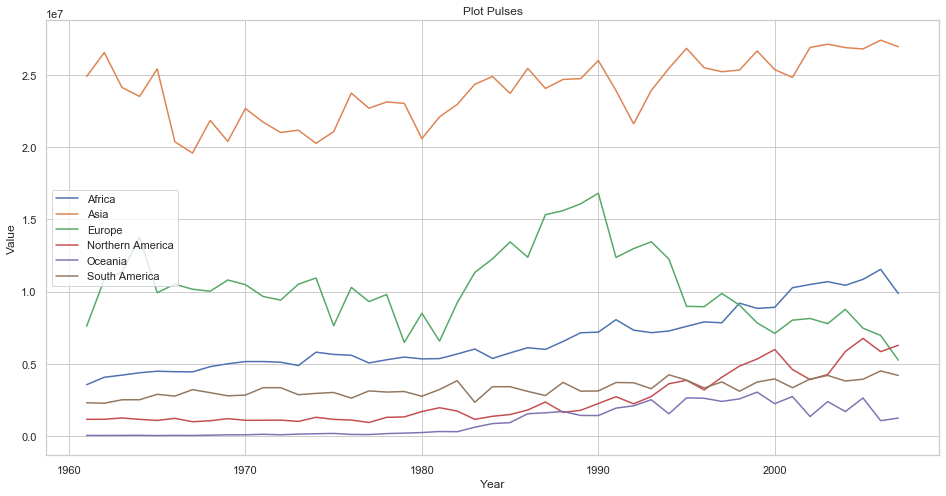

In [13]:
import seaborn as sns; sns.set(); sns.set_style('whitegrid')


plot_compare_areas(crops_cont[(crops_cont['Item'] == 'pulses_total')], 
                    y = 'Value', 
                    title='Plot Pulses')

## Crops emissions test visuals

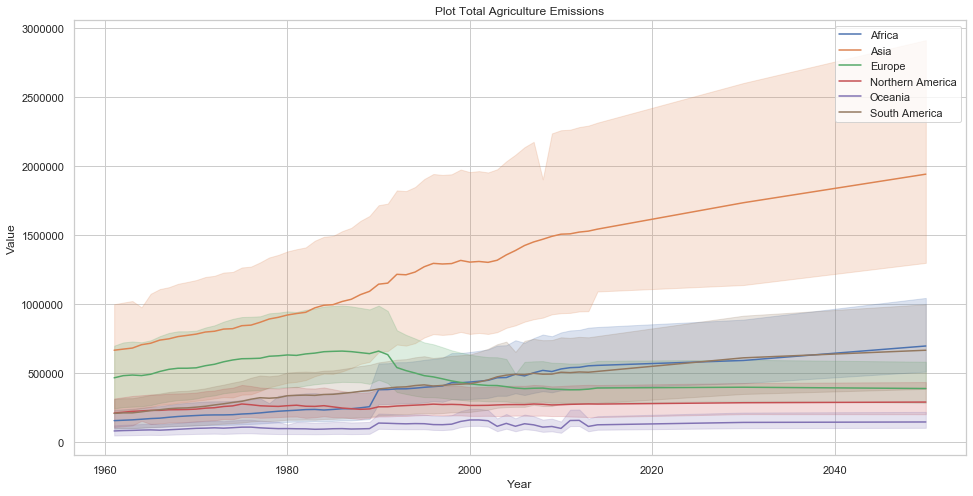

In [14]:
crops_emi_cont = pd.read_pickle('./data/pickles/crops_emissions_continents.pkl')

plot_compare_areas(crops_emi_cont, 
                    y = 'Value', 
                    title='Plot Total Agriculture Emissions')